In [20]:
import matplotlib.pyplot as plt
#import matplotlib.image as img
from PIL import Image as img
import numpy as np

In [21]:
image = np.asarray(img.open('test.jpg'))
print(image.shape)

(540, 960, 3)


In [22]:
h, w = image.shape[0], image.shape[1]
print(h, w)

540 960


(540, 960)


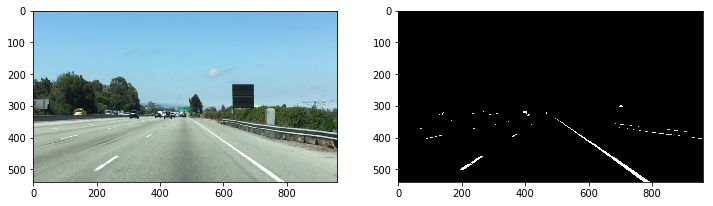

In [23]:
red_threshold = 210
green_threshold = 210
blue_threshold = 210


color_select = np.copy(image)

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
        
print(thresholds.shape)

color_select[thresholds] = [0, 0, 0]

f = plt.figure(figsize=(12, 10))
f.add_subplot(1, 2, 1)
plt.imshow(image)
f.add_subplot(1, 2, 2)
plt.imshow(color_select)
plt.show()

## Region Masking

We will focus on a triangular region in the bottom half of the image to help us eliminate extra object on the periphery.

In [24]:
left_bottom = [0, h-1]
right_bottom = [w-1, h-1]
apex = [w / 2.0, h * 0.6]
print((left_bottom, right_bottom, apex))

([0, 539], [959, 539], [480.0, 324.0])


Fit lines $$y=Ax+B$$ to identify the three-sided region of interest; 
np.polyfit return the coefficients (A, B) of the fit. The last parameter, '1', is the degree of the fitting polynomial, i.e. a line.

In [25]:
def _linefit(a, b):
    return np.polyfit((a[0], b[0]), (a[1], b[1]), 1)

left_A, left_B = _linefit(left_bottom, apex)
right_A, right_B = _linefit(right_bottom, apex)
bottom_A, bottom_B = _linefit(left_bottom, right_bottom)

Find the region inside the lines:

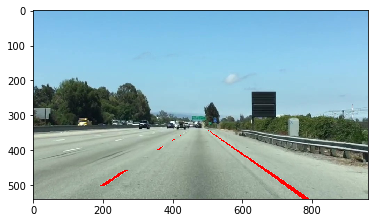

In [26]:
XX, YY = np.meshgrid(np.arange(0, w), np.arange(0, h))

left = YY > (XX * left_A + left_B)
right = YY > (XX * right_A + right_B)
bottom = YY < (XX * bottom_A + bottom_B)

region_thresholds = left & right & bottom

region_select = np.copy(image)
region_select[~thresholds & region_thresholds] = [255, 0, 0]

plt.imshow(region_select)
plt.show()